# Evaluation Metrics

This file provides several evaluation metrics, which are used to evaluate the performance of models we are building.\
 \
The evaluation metrics include:
     1. Confusion Matrix
     2. Accuracy Rate
     3. PPV & NPV
     4. Sensitivity & Specificity
     5. AUC-ROC Curve
     6. Cumulative Gains Chart
     
If there are new evaluation metrics applied in the future, the file will be updated.

In [128]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report 

# 1. Confusion Matrix

In [129]:
actual = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0] 
predicted = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0] 

In [130]:
Matrix=confusion_matrix(actual,predicted)
df_matrix=pd.DataFrame(Matrix,columns=['pred_0','pred_1'],index=['actual_0','actual_1'])
df_matrix

,pred_0,pred_1
actual_0,4,2
actual_1,1,3


# 2. Accuracy Rate
$$ACC=\frac{TP+TN}{TP+TN+FP+FN}$$

In [131]:
tn, fp, fn, tp=Matrix.ravel()
(tn, fp, fn, tp)

(4, 2, 1, 3)

In [132]:
acc=(tp+tn)/(tp+tn+fp+fn)
acc

0.7

In [133]:
#sklearn
accuracy_score(actual,predicted)

0.7

# 3. PPV & NPV
$$PPV=\frac{TP}{TP+FP}$$


In [134]:
ppv=tp/(tp+fp)
ppv

0.6

In [135]:
#sklearn
precision_score(actual,predicted)

0.6

$$NPV=\frac{TN}{TN+FN}$$

In [136]:
npv=tn/(tn+fn)
npv

0.8

# 4. Sensitivity & Specificity

$$TPR(Sensitivity)=\frac{TP}{TP+FN}$$

In [137]:
tpr=tp/(tp+fn)
tpr

0.75

$$TNR(Specificity)=\frac{TN}{TN+FP}$$

In [138]:
tnr=tn/(tn+fp)
tnr

0.6666666666666666

# Summary Table

In [139]:
summary_matrix=(acc,ppv,npv,tpr,tnr)
summary_matrix

(0.7, 0.6, 0.8, 0.75, 0.6666666666666666)

In [140]:
df_summary=pd.DataFrame(summary_matrix,columns=['Value'],index=['Accuracy','PPV','NPV','Sensitivity','Specificity'])
df_summary

,Value
Accuracy,0.700000
PPV,0.600000
NPV,0.800000
Sensitivity,0.750000
Specificity,0.666667


# 5. Cumulative Gains Chart

In [141]:
contractor_id=[1,2,3,4,5,6,7,8,9,10]
actual=[0,1,1,1,1,1,1,1,1,1]
#this is a random generated list, the value should be the predicted probabilities in the model
predicted_prob=np.random.uniform(0,1,10)
predicted= [int(round(x)) for x in predicted_prob]

In [142]:
df_result=pd.DataFrame()
df_result["contractor_id"]=contractor_id
df_result["actual"]=actual
df_result["predicted"]=predicted
df_result["predicted_prob"]=predicted_prob

In [143]:
def TP(columna,columnb):
    if columna==1 and columnb==1:
        x=1
    else:
        x=0
    return x

In [144]:
df_result=df_result.sort_values(by=["predicted_prob"],ascending=False)
df_result["Actual_Positive"]=df_result.apply(lambda x: TP(x["actual"],x["predicted"]),axis=1)
df_result["Cumulative_Positives"]=df_result["Actual_Positive"].cumsum()
total_positives=df_result["Actual_Positive"].sum()
df_result["Cumulative_Positives_percent"]=df_result["Cumulative_Positives"]/total_positives
df_result["Cumulative_Count"]=df_result["contractor_id"].expanding().count()/df_result["contractor_id"].count()

In [145]:
df_result

,contractor_id,actual,predicted,predicted_prob,Actual_Positive,Cumulative_Positives,Cumulative_Positives_percent,Cumulative_Count
0,1,0,1,0.997005,0,0,0.000000,0.1
6,7,1,1,0.839523,1,1,0.333333,0.2
4,5,1,1,0.742242,1,2,0.666667,0.3
8,9,1,1,0.637087,1,3,1.000000,0.4
3,4,1,0,0.281445,0,3,1.000000,0.5
9,10,1,0,0.123858,0,3,1.000000,0.6
5,6,1,0,0.123492,0,3,1.000000,0.7
2,3,1,0,0.115465,0,3,1.000000,0.8
7,8,1,0,0.073879,0,3,1.000000,0.9
1,2,1,0,0.062873,0,3,1.000000,1.0


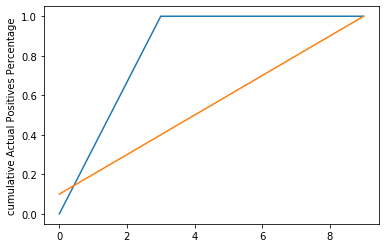

In [146]:
import matplotlib.pyplot as plt
plt.plot(df_result["Cumulative_Positives_percent"].values.tolist())
plt.plot(df_result["Cumulative_Count"].values.tolist())
plt.ylabel('cumulative Actual Positives Percentage')

plt.show()

# 6.  AUC-ROC Curve

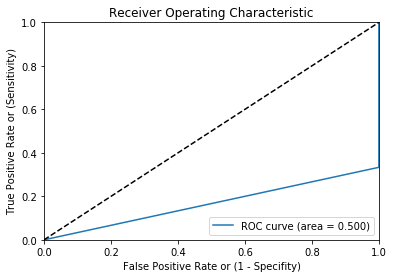

In [147]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(actual, predicted)
roc_auc = auc(actual, predicted)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")